In [ ]:
# MITx 15.071xThe Analytics Edge
# Unit 1 Assignment 1 Exercise 1: An Analytical Detective

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
os.chdir("E:\\eDX - Analytics Edge\\Unit 1\\")

In [4]:
mvt = pd.read_csv("mvtWeek1.csv")

c:\program files\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
# Problem 1.1 - Loading the Data
# No. of rows of data (observations) are in this dataset
len(mvt)

191641

In [221]:
# # Problem 1.2 - Loading the Data
#Check No. of columns
mvt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   191641 non-null  int64         
 1   Date                 191641 non-null  datetime64[ns]
 2   LocationDescription  191641 non-null  object        
 3   Arrest               191641 non-null  bool          
 4   Domestic             191641 non-null  bool          
 5   Beat                 191641 non-null  int64         
 6   District             148589 non-null  object        
 7   CommunityArea        167038 non-null  object        
 8   Year                 191641 non-null  int64         
 9   Latitude             189365 non-null  float64       
 10  Longitude            189365 non-null  float64       
 11  Month                191641 non-null  int64         
 12  Day                  191641 non-null  object        
dtypes: bool(2), da

In [7]:
# Problem 1.3 - Loading the Data
# maximum value of the column "ID"
mvt.ID.max()

9181151

In [8]:
# Problem 1.4 - Loading the Data
#minimum value of the column "Beat"
mvt.Beat.min()

111

In [9]:
# Problem 1.5 - Loading the Data
# No. of observations have value TRUE in the Arrest variable
(mvt.Arrest == True).sum()

15536

In [10]:
# No. of observations have value TRUE in the Arrest variable
len(mvt[mvt.Arrest == True])

15536

In [11]:
# Problem 1.6 - Loading the Data
# No. of observations have a LocationDescription value of ALLEY
len(mvt[mvt.LocationDescription == 'ALLEY'])

2308

In [12]:
# Problem 2.1 - Understanding Dates
# In what format are the entries in the variable Date
mvt.head(1)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012,41.756284,-87.621645


In [13]:
mvt.Date.astype("datetime64").min()

Timestamp('2001-01-01 00:01:00')

In [14]:
# Problem 2.2 - Understanding Dates
#month and year of the median date in our dataset
import statistics
statistics.median(mvt.Date.astype("datetime64"))

In [15]:
statistics.median(mvt.Date.astype("datetime64"))

Timestamp('2006-05-21 12:30:00')

In [16]:
mvt.describe()

,ID,Beat,Year,Latitude,Longitude
count,1.916410e+05,191641.000000,191641.000000,189365.000000,189365.000000
mean,4.968629e+06,1258.810771,2006.134940,41.844555,-87.677782
std,2.342997e+06,702.530465,3.520285,0.085583,0.057333
min,1.310022e+06,111.000000,2001.000000,41.644710,-87.925510
25%,2.832144e+06,722.000000,2003.000000,41.771618,-87.718474
50%,4.762956e+06,1121.000000,2006.000000,41.850029,-87.677597
75%,7.201878e+06,1733.000000,2009.000000,41.917116,-87.635513
max,9.181151e+06,2535.000000,2012.000000,42.022878,-87.524676


In [26]:
mvt.Date = mvt.Date.astype("datetime64")

In [32]:
mvt.Date.dt.day

0         31
1         31
2         31
3         31
4         31
          ..
191636     1
191637     1
191638     1
191639     1
191640     1
Name: Date, Length: 191641, dtype: int64

In [33]:
 mvt.Date.dt.month

0         12
1         12
2         12
3         12
4         12
          ..
191636     1
191637     1
191638     1
191639     1
191640     1
Name: Date, Length: 191641, dtype: int64

In [89]:
# two new columns in mvt data frame, Month and Weekday
mvt["Month"] = mvt.Date.dt.month
mvt["Day"] = mvt.Date.dt.day_name()

In [90]:
mvt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   191641 non-null  int64         
 1   Date                 191641 non-null  datetime64[ns]
 2   LocationDescription  191641 non-null  object        
 3   Arrest               191641 non-null  bool          
 4   Domestic             191641 non-null  bool          
 5   Beat                 191641 non-null  int64         
 6   District             148589 non-null  object        
 7   CommunityArea        167038 non-null  object        
 8   Year                 191641 non-null  int64         
 9   Latitude             189365 non-null  float64       
 10  Longitude            189365 non-null  float64       
 11  Month                191641 non-null  int64         
 12  Day                  191641 non-null  object        
dtypes: bool(2), da

In [44]:
# Problem 2.3 - Understanding Dates
# In which month did the fewest motor vehicle thefts occur?
(mvt.Month.value_counts())

10    17086
7     16801
8     16572
12    16426
11    16063
9     16060
1     16047
5     16035
6     16002
3     15758
4     15280
2     13511
Name: Month, dtype: int64

In [81]:
(mvt.Day.value_counts())

<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x00000292F63DE160>>    191641
Name: Day, dtype: int64

In [66]:
pd.to_datetime(mvt["Date"])

0        2012-12-31 23:15:00
1        2012-12-31 22:00:00
2        2012-12-31 22:00:00
3        2012-12-31 22:00:00
4        2012-12-31 21:30:00
                 ...        
191636   2001-01-01 00:05:00
191637   2001-01-01 00:01:00
191638   2001-01-01 00:01:00
191639   2001-01-01 00:01:00
191640   2001-01-01 00:01:00
Name: Date, Length: 191641, dtype: datetime64[ns]

In [95]:
# Problem 2.4 - Understanding Dates
# weekday on which the most motor vehicle thefts occur
mvt.Day.value_counts().max

<bound method Series.max of Friday       29284
Wednesday    27416
Monday       27397
Thursday     27319
Saturday     27118
Tuesday      26791
Sunday       26316
Name: Day, dtype: int64>

In [105]:
# Problem 2.5 - Understanding Dates
# month has the largest number of motor vehicle thefts for which an arrest was made
mvt[mvt.Arrest == True].Month.value_counts().max 

<bound method Series.max of 1     1435
12    1397
10    1342
8     1329
7     1324
3     1298
11    1256
4     1252
9     1248
2     1238
6     1230
5     1187
Name: Month, dtype: int64>

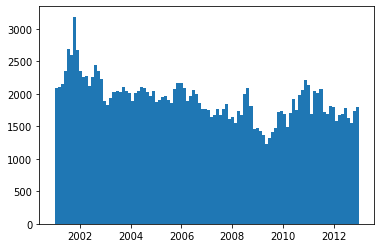

In [232]:
# Problem 3.1 - Visualizing Crime Trends
# make a histogram of the variable Date
plt.hist(x=mvt["Date"], bins=100)
plt.show()
#mvt.hist(column=mvt["Date"], bins=100)

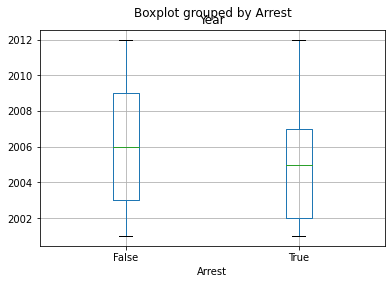

In [233]:
# Problem 3.2 - Visualizing Crime Trends

# Create a boxplot of the variable "Date"(This should be year?), sorted by the variable "Arrest"
#Does it look like there were more crimes for which arrests were made in the first half of the time period 
#or the second half of the time period? 
#(Note that the time period is from 2001 to 2012, so the middle of the time period is the beginning of 2007.)
_ = mvt.boxplot(by = "Arrest", column="Year")


In [155]:
# Problem 3.3 - Visualizing Crime Trends
# For what proportion of motor vehicle thefts in 2001 was an arrest made?
mvt.Arrest[mvt["Year"] == 2001].value_counts(normalize = True)

False    0.895883
True     0.104117
Name: Arrest, dtype: float64

In [157]:
# Problem 3.4 - Visualizing Crime Trends
# For what proportion of motor vehicle thefts in 2007 was an arrest made?
mvt.Arrest[mvt["Year"]==2007].value_counts(normalize=True)

False    0.915126
True     0.084874
Name: Arrest, dtype: float64

In [158]:
# Problem 3.5 - Visualizing Crime Trends
# For what proportion of motor vehicle thefts in 2012 was an arrest made?
mvt.Arrest[mvt["Year"]==2012].value_counts(normalize=True)

False    0.960971
True     0.039029
Name: Arrest, dtype: float64

In [167]:
# Problem 4.1 - Popular Locations
#Which locations are the top five locations for motor vehicle thefts, excluding the “Other” category?
mvt.LocationDescription[mvt["LocationDescription"] != "OTHER"].value_counts().head(5)

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

In [176]:
mvt.LocationDescription[mvt["LocationDescription"] != "OTHER"].value_counts().head(5)

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

In [180]:
# Problem 4.2 - Popular Locations
# Create new DF to Store top 5 location data
top5_loc = mvt.LocationDescription[mvt["LocationDescription"] != "OTHER"].value_counts().head(5)

In [199]:
# Create a subset of your data, only taking observations for which the theft happened in one of these five locations, 
# and call this new data set "Top5"
Top5 = mvt[mvt.LocationDescription.isin(top5_loc.keys())]

In [201]:
type(Top5)

pandas.core.frame.DataFrame

In [204]:
# Problem 4.2 - Popular Locations
# Find count of Top5
len(Top5)

177510

In [224]:
Top5.LocationDescription.value_counts() 

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

In [226]:
Top5.LocationDescription[Top5["Arrest"] == True].value_counts() 

STREET                            11595
PARKING LOT/GARAGE(NON.RESID.)     1603
GAS STATION                         439
ALLEY                               249
DRIVEWAY - RESIDENTIAL              132
Name: LocationDescription, dtype: int64

In [229]:
# Problem 4.3 - Popular Locations
# One of the locations has a much higher arrest rate than the other locations. Which is it?
(Top5.LocationDescription[Top5["Arrest"] == True].value_counts() / Top5.LocationDescription.value_counts()) * 100

ALLEY                             10.788562
DRIVEWAY - RESIDENTIAL             7.880597
GAS STATION                       20.795831
PARKING LOT/GARAGE(NON.RESID.)    10.793159
STREET                             7.405917
Name: LocationDescription, dtype: float64

In [218]:
#Problem 4.4 - Popular Locations
#On which day of the week do the most motor vehicle thefts at gas stations happen?

Top5[Top5["LocationDescription"] == "GAS STATION"].Day.value_counts()

Saturday     338
Sunday       336
Friday       332
Thursday     282
Monday       280
Wednesday    273
Tuesday      270
Name: Day, dtype: int64

In [219]:
# Problem 4.5 - Popular Locations
#On which day of the week do the fewest motor vehicle thefts in residential driveways happen?

Top5[Top5["LocationDescription"] == "DRIVEWAY - RESIDENTIAL"].Day.value_counts()

Thursday     263
Friday       257
Monday       255
Tuesday      243
Wednesday    234
Sunday       221
Saturday     202
Name: Day, dtype: int64